# Predicting heart disease using machine learning 

This notebook into various python based machine learning and data science libraries in an 
attempt to build a machine learning model capable of predicting wether someone has heart 
disease or not.

We're going to follow the following approach:
1. Problem Definition
2. Data 
3. Evalulate 
4. Features
5. Modelling 
6. Experimentation

## Problem Definition 

In a statement,
> Given clinical parameters about a patient, can we predict wether the person has heart disease or not ?

## Data

The original data came from the Cleavland data form the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version available on kaggle 
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Evaluation 

> if we can reach 95% accuracy in predicting wether a person has heart disease during the proof of concept 
we can continue to pursue.

## Features

This is where you will get different information about each of the feature in your data.

Only 14 attributes used:
1. #3 (age) - age in years
2. #4 (sex) - sex (1 = male; 0 = female)
3. #9 (cp)  - chest pain type
                -- Value 1: typical angina
                -- Value 2: atypical angina
                -- Value 3: non-anginal pain
                -- Value 4: asymptomatic
                
4. #10 (trestbps) - resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) - serum cholestoral in mg/dl
6. #16 (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg) -  resting electrocardiographic results
                    -- Value 0: normal
                    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
                    
8. #32 (thalach) - maximum heart rate achieved
9. #38 (exang) - exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) - ST depression induced by exercise relative to rest
11. #41 (slope) -  the slope of the peak exercise ST segment
                -- Value 1: upsloping
                -- Value 2: flat
                -- Value 3: downsloping
                
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
13. #51 (thal) -  3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (target) 0 0r 1 heart disease or not


## Preparing the tools 

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# IMP NOTES: 
#      Linear regression is used for regression or to predict continuous values
#      whereas logistic regression can be used both in classification and regression
#      problems but it is widely used as a classification algorithm

# Scikit learn models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve


* As of Scikit-Learn version 1.2+, plot_roc_curve is now RocCurveDisplay, 
* you can see the documentation for this here ->
* : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay


# Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (Exploratory data analysis or EDA)

The goal is to find more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.count() # lets see how many rows there are in each column.

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [5]:
# let's see if there is any missing values 
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


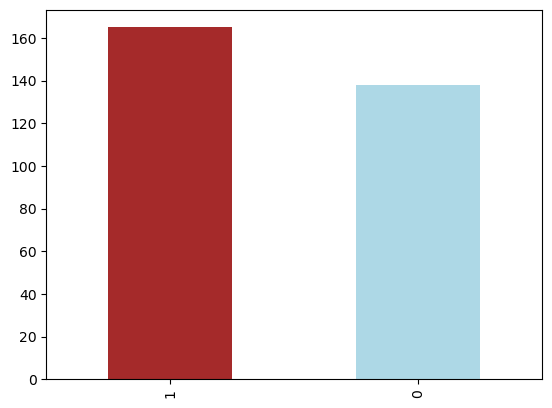

In [8]:
df["target"].value_counts().plot(kind = "bar", color=["brown", "lightblue"]);

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


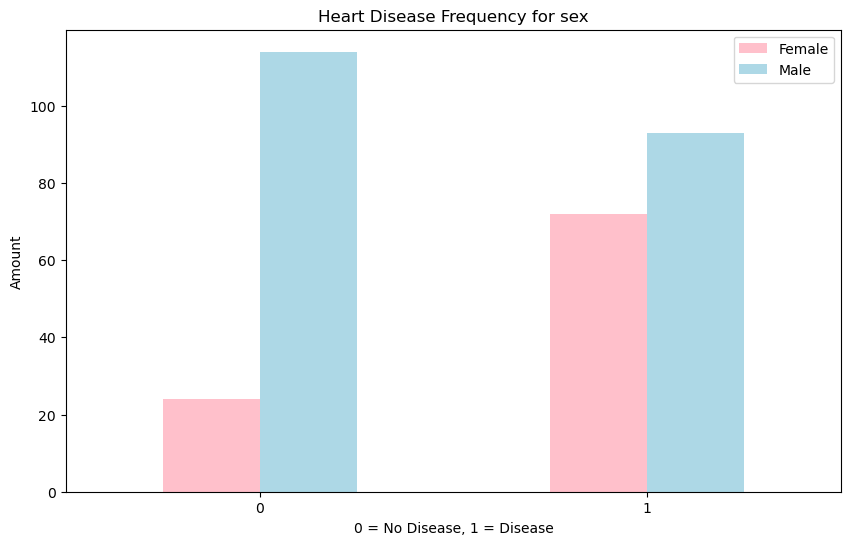

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6),
                                    color=["pink", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease 


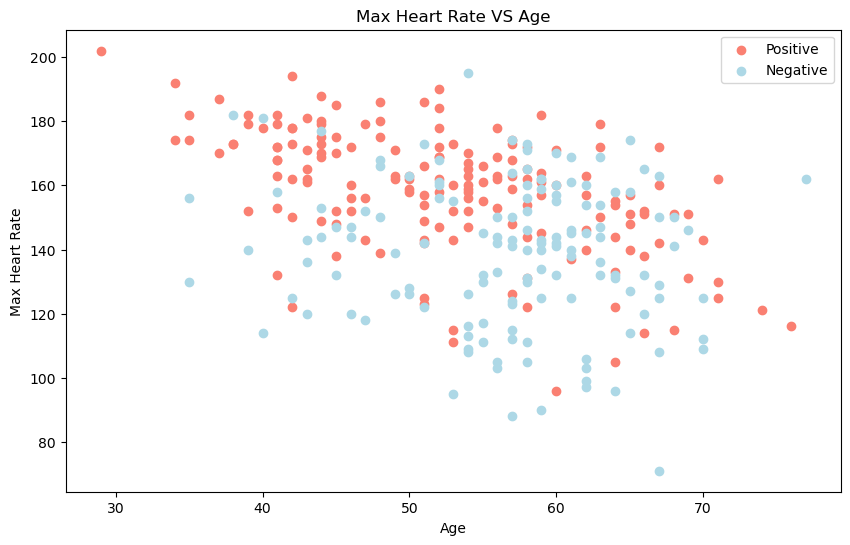

In [15]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
             df.thalach[df.target==1],
           color="salmon")

# Scattere with negative example
plt.scatter(df.age[df.target==0],
             df.thalach[df.target==0],
           color="lightblue")

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate VS Age")
plt.legend(["Positive","Negative"])

<Axes: ylabel='Frequency'>

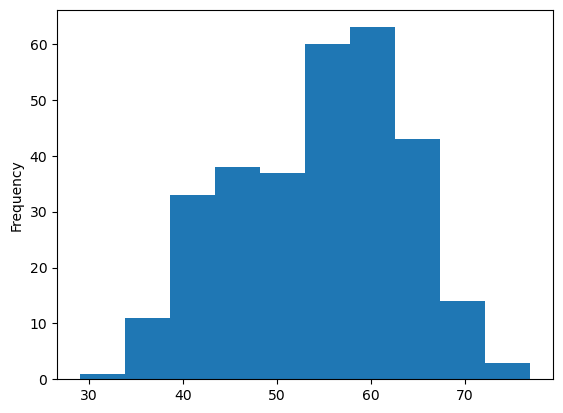

In [16]:
# Check the distribution of the age column
# It's also the best way to find the outliers 
df.age.plot.hist()

### Heart disease frequency per Chest Pain Type
 (cp) - chest pain type

         -- Value 1: typical angina - squeezing, pressure, heaviness, tightness or pain in the chest.
         -- Value 2: atypical angina - atigue, shortness of breath, discomfort in the throat, jaw, neck, arms, back and stomach—a feeling described almost like a muscle pull or pain.
         -- Value 3: non-anginal pain - typically esophageal spasms (non heart related)
         -- Value 4: asymptomatic - chest pain not showing signs of diseases

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

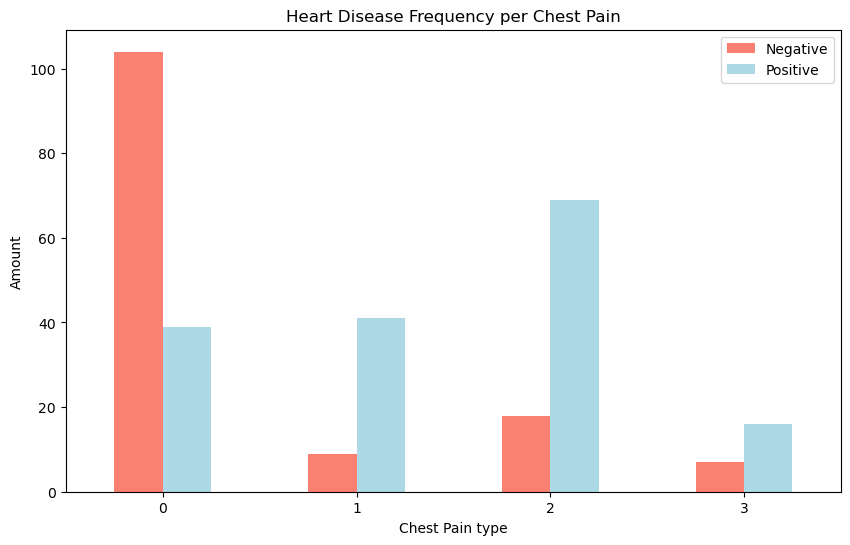

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize = (10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["Negative", "Positive"])
plt.xticks(rotation=0)

In [19]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


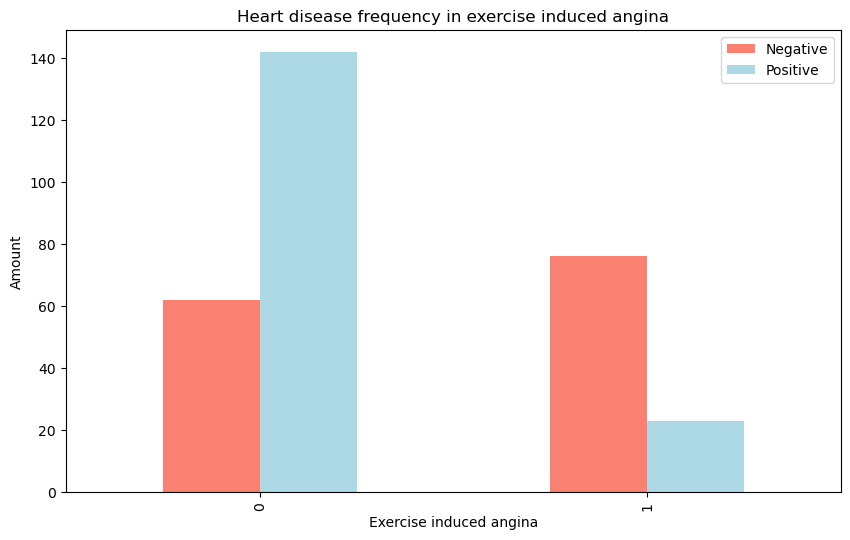

In [20]:
pd.crosstab(df.exang, df.target).plot(kind="bar",
                                      figsize=(10, 6),
                                      color=["salmon","lightblue"])
plt.title("Heart disease frequency in exercise induced angina")
plt.xlabel("Exercise induced angina")
plt.ylabel("Amount")
plt.legend(["Negative","Positive"])

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


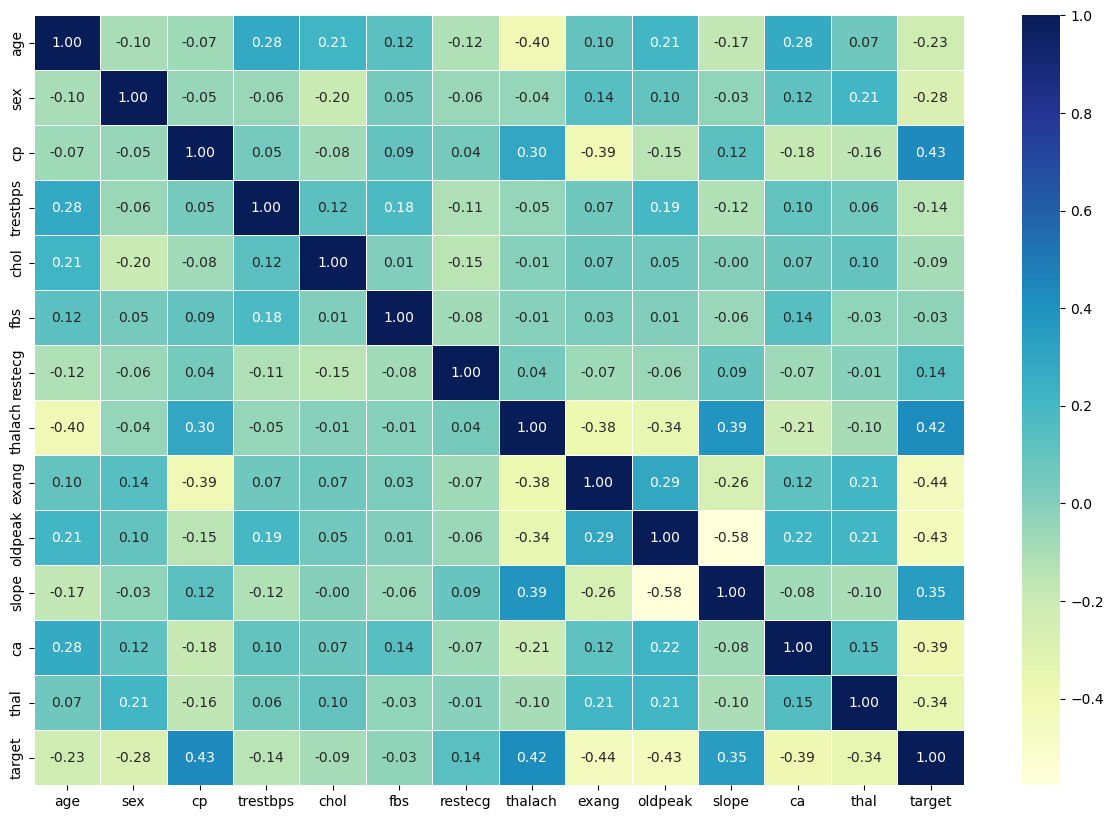

In [22]:
# Lets visualize it using heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## 5. Modeling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# split data into X and y 
X = df.drop("target", axis=1)
y = df["target"] 

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
# split into training and test splits
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [29]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN":  KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(mdoels, X_train, X_test, y_train, y_test):
    np.random.seed(3)
    # Make a dictionary to keep model score
    model_scores={}
    for name, model in models.items():
        #fit the model 
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [30]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\hp\Desktop\Heart-Dissease-Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

# MODEL COMPARISON

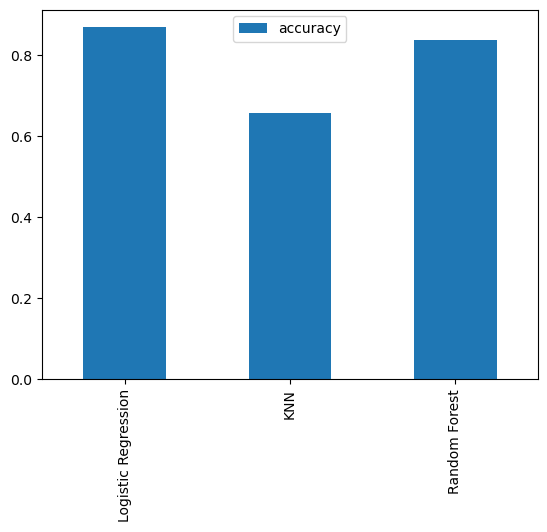

In [31]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

Now we've got our baseline model and we know a model's first 
predictions aren't always what we should based our next steps off.
what should we do?

Lets look at the following :
* Hyperparameter Tuning 
* Feature importance 
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve 
* Area under the curve (AUC)
 

In [32]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## HYPERPARAMETER TUNING 

In [33]:
# Lets tune KNN
train_score=[]
test_score=[]

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different neighbours 
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # Fit the algorithm
    knn.fit(X_train, y_train)
    # Update the training score list
    train_score.append(knn.score(X_train, y_train))
    # Update the test score list
    test_score.append(knn.score(X_test, y_test))
    

In [34]:
train_score

[1.0,
 0.8140495867768595,
 0.7892561983471075,
 0.7479338842975206,
 0.7727272727272727,
 0.7520661157024794,
 0.731404958677686,
 0.7355371900826446,
 0.7355371900826446,
 0.731404958677686,
 0.7231404958677686,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6776859504132231,
 0.6900826446280992,
 0.6859504132231405,
 0.6859504132231405,
 0.6942148760330579]

In [35]:
test_score

[0.5573770491803278,
 0.5081967213114754,
 0.6065573770491803,
 0.5573770491803278,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.5573770491803278]

Maximum knn score on the test data:67.21%


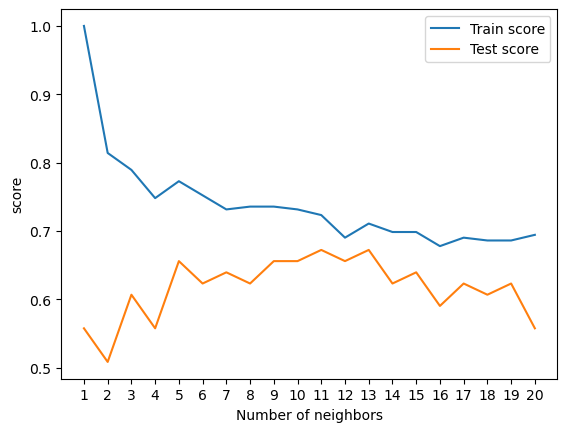

In [36]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(range(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("score")

plt.legend()
print(f"Maximum knn score on the test data:{max(test_score)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune :
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [37]:
# Create Hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),  #C: disincentivize and regulate overfitting,  smaller numbers in order to get stronger regularization. 
                "solver": ["liblinear"]}   #Solver: Solver is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.
                                           #Liblinear: high dimension dataset, large-scale Classification problems  
                                          
# Create Hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1,20,2)}# 

Now we've got our hyperparameter grid setup for each of our models, let's tune them using
RandomizedSearchCV

In [38]:
# Setup random seed
np.random.seed(3)

# set up randomized search cv for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit train data , remember it takes array
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [40]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

In [ ]:
# Setup random seed
np.random.seed(3)

# set up randomized search cv for logistic regression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit train data , remember it takes array
rs_rf.fit(X_train, y_train)

In [42]:
rs_rf.score(X_test, y_test)

0.8360655737704918

### Hyperparameter tuning using grid search cv

In [43]:
log_reg_grid2 = {"C":np.logspace(-4,4,20),  #C: disincentivize and regulate overfitting,  smaller numbers in order to get stronger regularization. 
                "solver": ["liblinear"]}   #Solver: Solver is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.
                                           #Liblinear: high dimension dataset, large-scale Classification problems  
                                          
# Create Hyperparameter grid for Random Forest Classifier
rf_grid2 = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1,20,2)}

In [44]:
# setup random seed
np.random.seed(3)

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid2,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
# Check the best params
gs_log_reg.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating our model beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classifiacation report
* Precision
* Recall
* F-1 score

... and it would be great if cross-validation was used where ever was possible

In [47]:
# Make predictions with our trained model
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

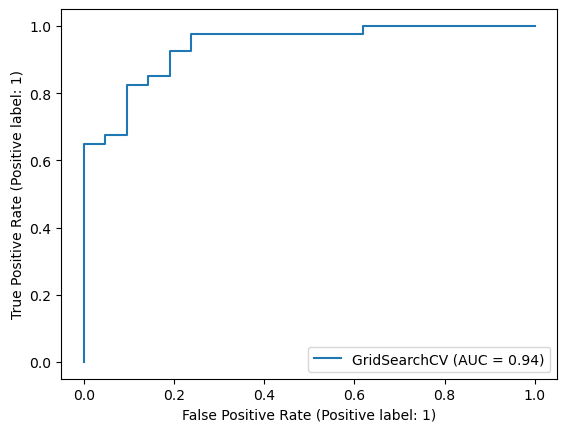

In [49]:
# Plot roc curve

# There are two ways to plot roc curve 
# from_predictions -> you need to pass true_label, pred_label only
# from_estimator

# fpr, tpr, thresholds = roc_curve(y_test, y_preds)
RocCurveDisplay.from_estimator (gs_log_reg, X_test, y_test)

In [50]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))    

[[16  5]
 [ 2 38]]


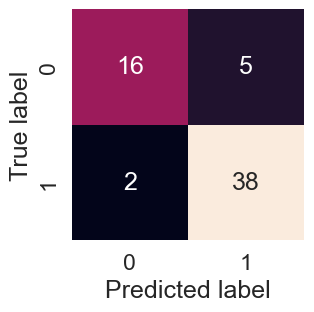

In [51]:
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heat map
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                      cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_matrix(y_test, y_preds)    

In [52]:
# Lets create a calssification repaort

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.95      0.92        40

    accuracy                           0.89        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.89      0.89      0.88        61



In [54]:
# ASSIGNMENT :) WRITE ABOUT EACH OF THEM

### Calculate evaluation metrics using cross-validation 

we're going to calculate precision, recall and f1 score of our model 
using cross-validation and to do so we'll be using `cross_val_score`

In [55]:
gs_log_reg.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [56]:
# Create a classifier with best parameters
clf = LogisticRegression(C=206.913808111479, solver="liblinear")

In [57]:
# Cross-validated accuracy, precision, recall and f1 score
def metric_eval(X, y):
    metric =["accuracy", "precision", "recall", "f1"]
    cv_metric={}
    for i in metric:
        cv_score = cross_val_score(clf,
                                 X, 
                                 y,
                                 cv=5,
                                 scoring=i)
        score = np.mean(cv_score)
        cv_metric[i] = score
        print(f"{i} score : {score}" )
        
    return cv_metric    

In [58]:
cv_metric = metric_eval(X, y)

accuracy score : 0.831584699453552
precision score : 0.8239892427392427
recall score : 0.8848484848484848
f1 score : 0.8521267621267622


<Axes: title={'center': 'Cross validated classification metrics'}>

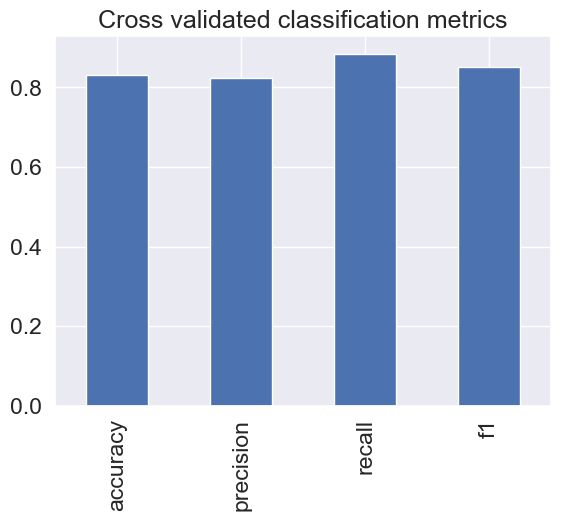

In [59]:
#Visualize cross-validation metrics
cv_metrics = pd.DataFrame(cv_metric, index=[0])
cv_metrics.T.plot.bar(title="Cross validated classification metrics",
                      legend=False)

## Feature importance
Feature means, which feature has contributed most to the outcomes of the model and how did they contribute?


In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# fit an instance of logistic regression
clf = LogisticRegression(C = 206.913808111479, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=206.913808111479, solver='liblinear')

In [62]:
# Check coef_
clf.coef_   #(its like corelationpd.)

array([[-0.01321818, -1.77157131,  0.80249066, -0.01982246, -0.00429391,
         0.32066718,  0.38410194,  0.02521547, -0.89440136, -0.52683528,
         0.56225523, -0.62812651, -0.87059398]])

In [63]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.013218183334331569,
 'sex': -1.771571311191802,
 'cp': 0.8024906595985852,
 'trestbps': -0.019822460886496893,
 'chol': -0.004293906365779054,
 'fbs': 0.3206671804243,
 'restecg': 0.38410193595637787,
 'thalach': 0.02521547403995464,
 'exang': -0.8944013613411033,
 'oldpeak': -0.5268352784059276,
 'slope': 0.5622552277954952,
 'ca': -0.6281265055021529,
 'thal': -0.8705939801940205}

<Axes: title={'center': 'Feature Importance'}>

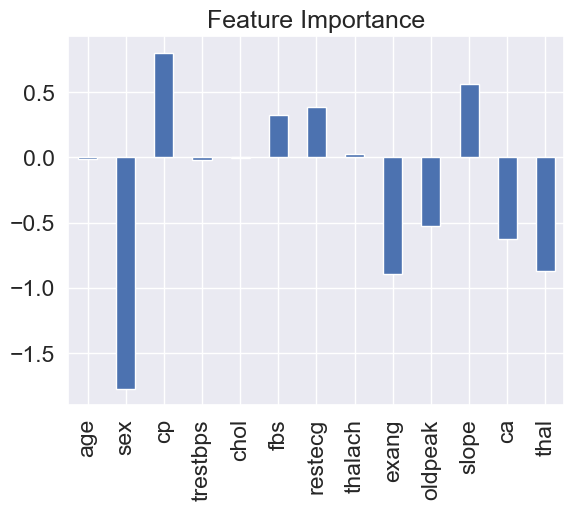

In [64]:
#Visualze the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [65]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [66]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## . EXPERIMENTATION

* if you haven't hit your evaluation metric yet... ask yourself...
* Could you collect more data?
* Could you improve the current models?(beyond what we've done so far) Like XGBoost or CatBoost
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it?
                                        



### Lets try XGBOOST

In [67]:
# import sys
# !{sys.executable} -m pip install xgboost

In [68]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import cross_val_score
# cross_val_score(XGBClassifier(), X, y)

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

### Hypertuning XGBOOST

In [ ]:
clf.get_params

In [ ]:
# # XGBoost
# # n_jobs=-1 to allow run it on all cores
# params = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01,0.05,0.1],
#     'booster': ['gbtree', 'gblinear'],
#     'gamma': [0, 0.5, 1],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.5, 1, 5],
#     'base_score': [0.2, 0.5, 1]
# }

# gs2 = GridSearchCV(XGBClassifier(), param_grid=params, cv=5, verbose=True)
# gs2.fit(X_train, y_train)

# print('Best score:', gs2.best_score_)
# print('Best score:', gs2.best_params_)

## Lets try ExtraTreeClassifier

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

# clf = ExtraTreesClassifier(n_estimators=100)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)